In [264]:
%matplotlib inline

In [265]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combined_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [266]:
# Checking the number of mice.
mouse_data_combined_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [267]:
mouse_data_combined_df.shape

(1893, 8)

In [268]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = mouse_data_combined_df[mouse_data_combined_df.duplicated()]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [269]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = mouse_data_combined_df[(mouse_data_combined_df["Mouse ID"] == "g989")]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [270]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_df = mouse_data_combined_df[mouse_data_combined_df["Mouse ID"] != "g989"]
mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [271]:
# Checking the number of mice in the clean DataFrame.
mouse_data_df.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [272]:
mouse_data_df.shape

(1880, 8)

In [273]:
mouse_data_combined_df.shape

(1893, 8)

In [274]:
mouse_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Drug Regimen        1880 non-null   object 
 2   Sex                 1880 non-null   object 
 3   Age_months          1880 non-null   int64  
 4   Weight (g)          1880 non-null   int64  
 5   Timepoint           1880 non-null   int64  
 6   Tumor Volume (mm3)  1880 non-null   float64
 7   Metastatic Sites    1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [275]:
mouse_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [276]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [277]:
# Calculate Tumor Volume Summary Statistics
tumor_volume_mean = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_median = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = mouse_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [278]:
## SUMMARY STATISTICS
mouse_data_summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_volume_mean, "Tumor Volume Median": tumor_volume_median,
                                    "Tumor Volume Variance": tumor_volume_variance, "Tumor Volume Std. Dev": tumor_volume_std_dev,
                                    "Tumor Volume SEM": tumor_volume_sem
})
mouse_data_summary_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
## BAR and PIE CHARTS

In [280]:
mouse_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

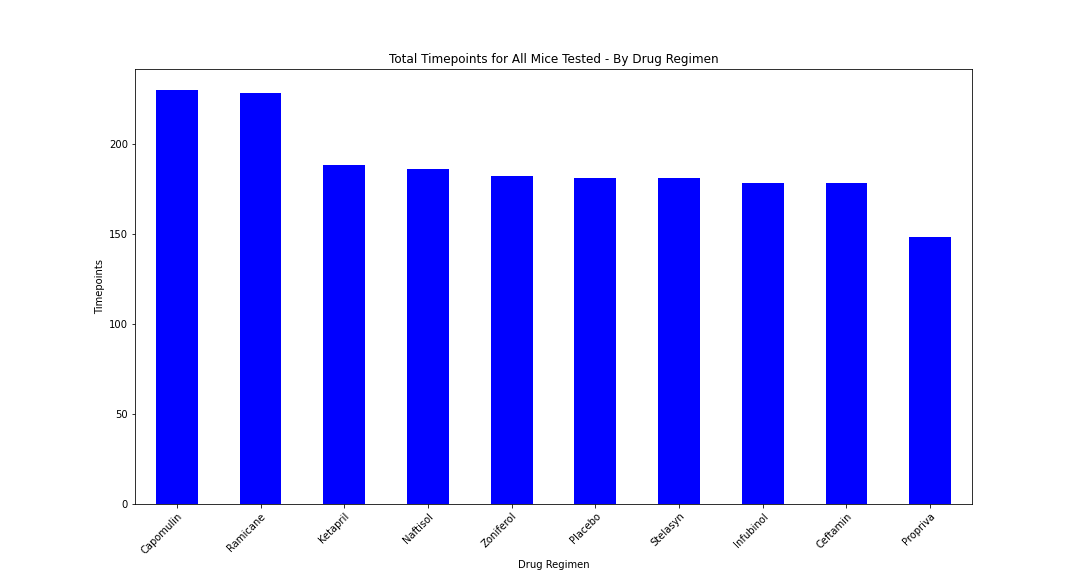

In [286]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
%matplotlib widget
# Get Drug Regimens
drug_regimen_data = mouse_data_df["Drug Regimen"].value_counts()

figure1 = drug_regimen_data.plot(kind="bar", facecolor="blue", figsize=(15,8),
                                title="Total Timepoints for All Mice Tested - By Drug Regimen",
                                xlabel="Drug Regimen",
                                ylabel="Timepoints")

# Configure x-ticks
xticklabels = drug_regimen_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

plt.show()

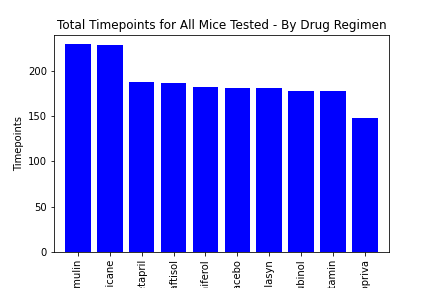

In [285]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
%matplotlib widget
drug_regimen_data = mouse_data_df["Drug Regimen"].value_counts()
plt.bar(drug_regimen_data.index.values, drug_regimen_data.values, color="blue", align="center")
plt.title("Total Timepoints for All Mice Tested - By Drug Regimen")
plt.xlabel("Drug Regimen")
plt.xticks(rotation="vertical")
plt.ylabel("Timepoints")
plt.xlim(-0.75, len(drug_regimen_data)-0.25)
plt.ylim(0, max(drug_regimen_data)+10)
plt.show()

<AxesSubplot:ylabel='Sex'>

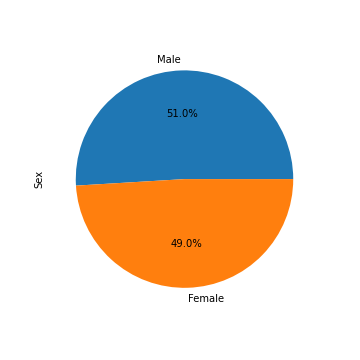

In [287]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib widget
male_female = mouse_data_df["Sex"].value_counts()
male_female.plot(kind="pie", figsize=(5,5), autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x253810af8b0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

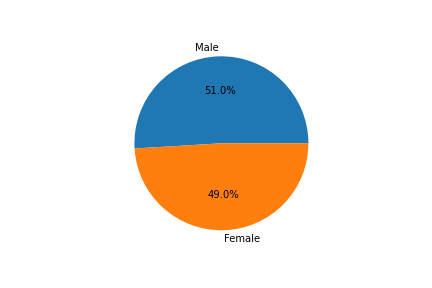

In [284]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib widget
male_female = mouse_data_df["Sex"].value_counts()
male_female_labels = ["Male", "Female"]
plt.pie(male_female, labels = male_female_labels, autopct="%1.1f%%")

In [ ]:
## QUARTILES, OUTLIERS AND BOXPLOTS